<a href="https://colab.research.google.com/github/lukyg/Baldness_Prediction/blob/main/Study_Case_Bald.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Studi Case : Kebotakan

## Data Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Case Study Chapter 3 Topic 3_ Dataset Kebotakan (Not Clean).csv to Case Study Chapter 3 Topic 3_ Dataset Kebotakan (Not Clean).csv


In [156]:
df = pd.read_csv('Case Study Chapter 3 Topic 3_ Dataset Kebotakan (Not Clean).csv')

In [157]:
df.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


In [158]:
df.shape

(7917, 14)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7832 non-null   float64
 1   jenis_kelamin  7840 non-null   object 
 2   pekerjaan      7760 non-null   object 
 3   provinsi       7831 non-null   object 
 4   gaji           7843 non-null   float64
 5   is_menikah     7845 non-null   float64
 6   is_keturunan   7828 non-null   float64
 7   berat          7861 non-null   float64
 8   tinggi         7843 non-null   float64
 9   sampo          7858 non-null   object 
 10  is_merokok     7847 non-null   float64
 11  pendidikan     7847 non-null   object 
 12  stress         7853 non-null   float64
 13  botak_prob     7838 non-null   float64
dtypes: float64(9), object(5)
memory usage: 866.0+ KB


In [160]:
df.describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,botak_prob
count,7832.000000,7.843000e+03,7845.000000,7828.000000,7861.000000,7843.000000,7847.000000,7853.000000,7838.000000
mean,39.492722,8.853770e+06,0.979095,0.204650,55.957306,167.252704,0.497133,5.456259,0.573851
std,9.882786,4.499844e+06,0.143076,0.403471,9.594065,10.933646,0.500024,2.860623,0.173386
min,2.000000,1.500000e+06,0.000000,0.000000,40.000000,125.491784,0.000000,1.000000,0.064633
25%,33.000000,5.735468e+06,1.000000,0.000000,49.312715,159.758874,0.000000,3.000000,0.452360
50%,39.000000,7.850662e+06,1.000000,0.000000,53.839669,167.155287,0.000000,5.000000,0.567954
75%,46.000000,1.083589e+07,1.000000,0.000000,60.259654,174.439620,1.000000,8.000000,0.686782
max,77.000000,5.000000e+07,1.000000,1.000000,150.000000,226.454577,1.000000,10.000000,1.000000


## Exploratory Data Analisis (EDA)

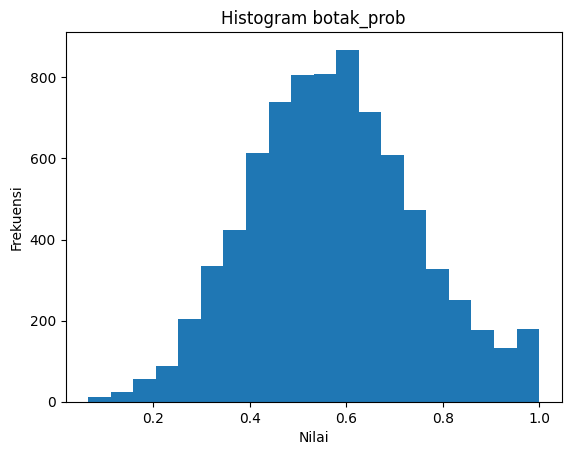

In [161]:
import matplotlib.pyplot as plt

plt.plot(figsize=(12,12))
plt.hist(x=df['botak_prob'], bins=20)
plt.title('Histogram botak_prob')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

Pada kolom target, yakni botak_prob, merupakan kolom yang menyatakan kemungkinan terjadi kebotakan pada individu. Berdasarkan histogram tersebut, distribusi data belum normal dan termasuk pada kategori skewed khususnya skewed ke kanan. Hal ini didasarkan pada titik puncak berada di sebelah kanan median data. Hal ini dapat terjadi oleh berbagai faktor seperti outlier, cara pengambilan data, dll. Sehingga perlu dilakukan penormalan distribusi pada data tersebut.

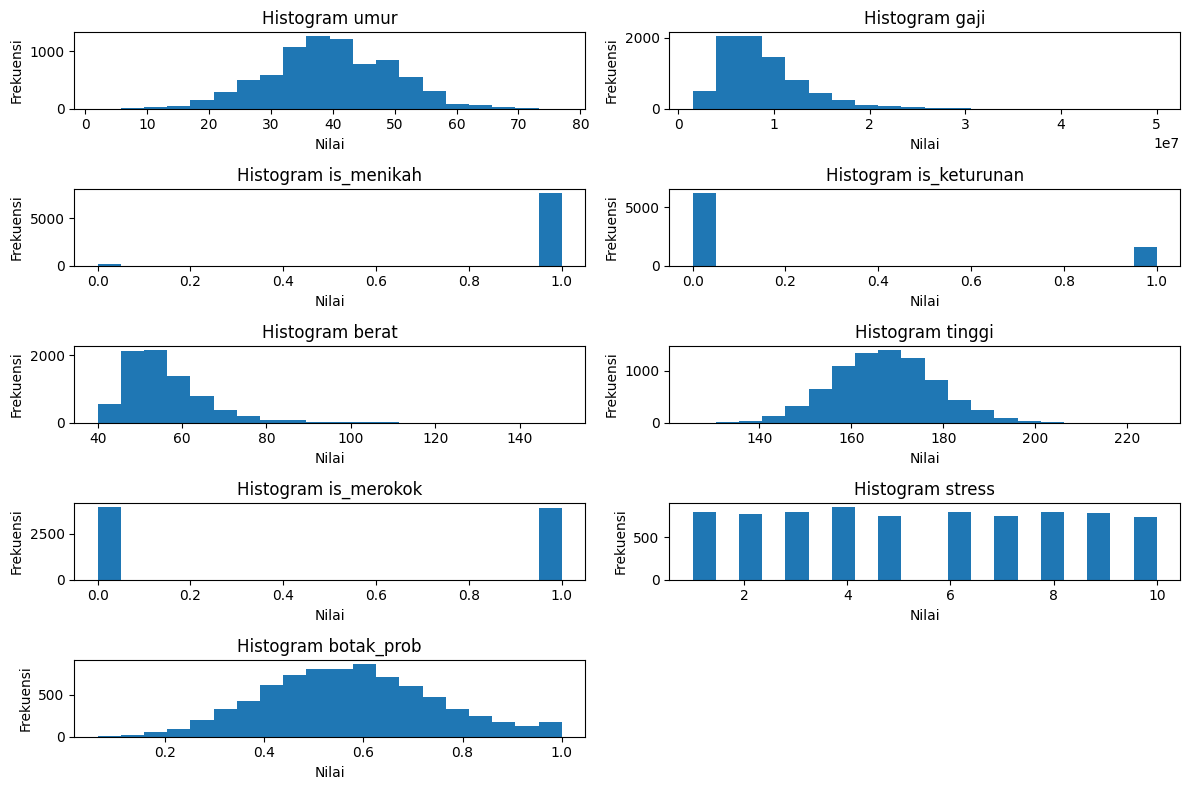

In [162]:
numeric =['umur', 'gaji', 'is_menikah', 'is_keturunan', 'berat', 'tinggi', 'is_merokok', 'stress', 'botak_prob']

num_plots = len(numeric)
rows = (num_plots + 1)//2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, column in enumerate(numeric):
    ax = axes.flatten()[i]
    ax.hist(df[column], bins=20)
    ax.set_title(f'Histogram {column}')
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Frekuensi')

# Hide empty subplots
for j in range(num_plots, rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Selain kolom botak_prob, tren dari masing-masing histogram dapat dilihat dan dominan belum terdistribusi dengan normal.

## Preprocessing

### Data Cleaning

#### Missing Value

In [163]:
#mengisi null dari is_menikah
umur_20 = df['umur'] <= 20
df['is_menikah'] = df['is_menikah'].fillna(umur_20.map({True:0, False:1}))

In [164]:
#fungsi mengisi null dengan mean untuk numerik
def fill_miss_mean(column):
  df[column] = df[column].fillna(df[column].mean())

fill_miss_mean(['umur','gaji','is_keturunan','berat','tinggi','is_merokok','stress'])

In [165]:
#fungsi mengisi null dengan modus untuk kategorik
def fill_miss_mod(df, columns):
    for column in columns:
        df[column] = df[column].fillna(df[column].mode()[0])

fill_miss_mod(df, ['jenis_kelamin', 'pekerjaan', 'provinsi', 'sampo', 'pendidikan'])

In [166]:
#menghilangkan botak prob
df.dropna(subset=['botak_prob'], inplace=True)

In [167]:
df.isnull().sum()

umur             0
jenis_kelamin    0
pekerjaan        0
provinsi         0
gaji             0
is_menikah       0
is_keturunan     0
berat            0
tinggi           0
sampo            0
is_merokok       0
pendidikan       0
stress           0
botak_prob       0
dtype: int64

#### Duplicated Data

In [168]:
df.duplicated(subset=['umur','sampo', 'berat', 'jenis_kelamin','pekerjaan','provinsi','pendidikan', 'stress', 'gaji']).sum()

81

In [169]:
df.drop_duplicates(inplace=True)

In [170]:
df.duplicated().sum()

0

In [171]:
df.shape

(7757, 14)

### Feature Selection

In [172]:
#feature selection
df = df.drop('provinsi', axis=1)

In [173]:
df.head()

,umur,jenis_kelamin,pekerjaan,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


Pada tahap ini, kolom provinsi dianggap tidak relevan sehingga untuk mengurangi fitur yang digunakan, maka kolom provinsi tidak digunakan.

### Feature Encode

In [174]:
df['pekerjaan'].value_counts()

pekerjaan
Pegawai swasta    3248
PNS               3047
Freelance         1135
Pengangguran       327
Name: count, dtype: int64

In [175]:
df['pekerjaan'].value_counts()

pekerjaan
Pegawai swasta    3248
PNS               3047
Freelance         1135
Pengangguran       327
Name: count, dtype: int64

In [176]:
df['sampo'].value_counts()

sampo
Deadbuoy           1635
Moonsilk           1560
Pantone            1544
Shoulder & Head    1538
Merpati            1480
Name: count, dtype: int64

Feature encoding adalah proses konversi data kategorik menjadi data numerik agar komputer mampu melakukan pemodelan. Sebelum melakukan feature encode, tahap awal yang dilakukan yakni memastikan nilai dari kolom. Hal ini dilakukan untuk memudahkan pada proses encoding. Ada banyak metode untuk melakukan encoding, namun pada kasus ini menggunakan label encoding khususnya menggunakan mapping.

In [177]:
#konversi kategorik jadi numerik
kolom_kategorik = ['jenis_kelamin', 'pekerjaan', 'sampo','pendidikan']

jk_map =({
    'Laki-laki':1,
    'Perempuan':0
})
pekerjaan_map=({
    'Pegawai swasta':0,
    'PNS':1,
    'Freelance':2,
    'Pengangguran':3
})
sampo_map=({
    'Deadbuoy':0,
    'Moonsilk':1,
    'Pantone':2,
    'Shoulder & Head':3,
    'Merpati':4
})
pendidikan_map=({
    'SD':0,
    'SMP':1,
    'SMA':2,
    'S1':3,
    'S2':4,
    'S3':5
})

my_map = [jk_map, pekerjaan_map, sampo_map, pendidikan_map]

for kolom, my_map in zip(kolom_kategorik, my_map):
  df[kolom] = df[kolom].map(my_map)

In [178]:
df.head()

,umur,jenis_kelamin,pekerjaan,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,0,1,7.957453e+06,1.0,0.0,54.315053,170.428542,2,1.0,3,5.0,0.605974
1,53.0,0,1,7.633003e+06,1.0,0.0,72.873404,165.530097,2,0.0,3,7.0,0.532860
2,37.0,0,0,6.637625e+06,1.0,0.0,46.321533,154.599388,1,0.0,3,4.0,0.418442
3,36.0,0,3,3.624871e+06,1.0,0.0,51.539781,167.340481,0,1.0,0,9.0,0.804050
4,38.0,1,2,6.031808e+06,1.0,0.0,60.726909,165.514773,4,1.0,4,1.0,0.368371


### Standardization and Normalization



In [179]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df['berat'] = MinMaxScaler().fit_transform(df['berat'].values.reshape(len(df), 1))
df['tinggi'] = MinMaxScaler().fit_transform(df['tinggi'].values.reshape(len(df), 1))
df['umur'] = StandardScaler().fit_transform(df['umur'].values.reshape(len(df), 1))
df['gaji'] = StandardScaler().fit_transform(df['gaji'].values.reshape(len(df), 1))

In [180]:
df.describe()

,umur,jenis_kelamin,pekerjaan,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
count,7.757000e+03,7757.000000,7757.000000,7.757000e+03,7757.000000,7757.000000,7757.000000,7757.000000,7757.000000,7757.000000,7757.000000,7757.000000,7757.000000
mean,-8.610419e-17,0.686606,0.811912,1.538883e-16,0.979116,0.204822,0.144963,0.413460,1.957200,0.498686,2.637875,5.446929,0.573762
std,1.000064e+00,0.463903,0.835687,1.000064e+00,0.143006,0.401329,0.086859,0.107765,1.415662,0.497866,0.906099,2.853937,0.173528
min,-3.816451e+00,0.000000,0.000000,-1.644231e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.064633
25%,-6.614789e-01,0.000000,0.000000,-6.917798e-01,1.000000,0.000000,0.084835,0.339771,1.000000,0.000000,2.000000,3.000000,0.451812
50%,-6.932123e-04,1.000000,1.000000,-2.134179e-01,1.000000,0.000000,0.126500,0.413627,2.000000,0.497133,3.000000,5.000000,0.567963
75%,6.615739e-01,1.000000,1.000000,4.336215e-01,1.000000,0.000000,0.183860,0.484003,3.000000,1.000000,3.000000,8.000000,0.686788
max,3.816546e+00,1.000000,3.000000,9.220846e+00,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,10.000000,1.000000


In [181]:
df.head()

,umur,jenis_kelamin,pekerjaan,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,-1.272119,0,1,-0.197618,1.0,0.0,0.130137,0.445082,2,1.0,3,5.0,0.605974
1,1.373987,0,1,-0.270302,1.0,0.0,0.298849,0.396565,2,0.0,3,7.0,0.532860
2,-0.254386,0,0,-0.493289,1.0,0.0,0.057468,0.288300,1,0.0,3,4.0,0.418442
3,-0.356159,0,3,-1.168213,1.0,0.0,0.104907,0.414496,0,1.0,0,9.0,0.804050
4,-0.152612,1,2,-0.629005,1.0,0.0,0.188426,0.396413,4,1.0,4,1.0,0.368371


### Outliers

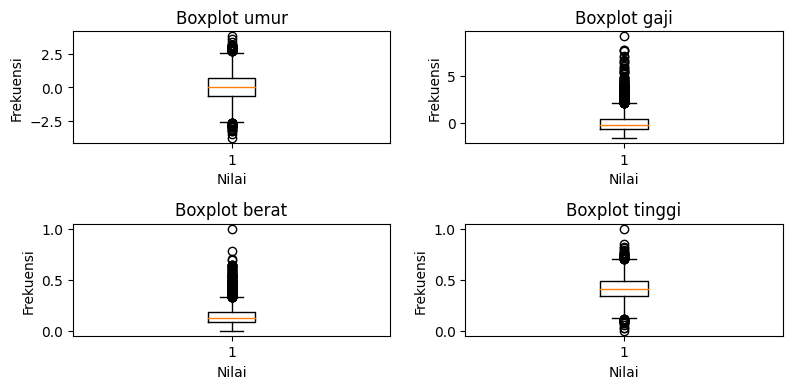

In [182]:
numeric =['umur', 'gaji','berat', 'tinggi']

num_plots = len(numeric)
rows = (num_plots + 1)//2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(8, 4))

for i, column in enumerate(numeric):
    ax = axes.flatten()[i]
    ax.boxplot(df[column])
    ax.set_title(f'Boxplot {column}')
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Berdasarkan boxplot tersebut, didapatkan bahwa pada kolom umur, gaji, tinggi dan berat terdapat outlier. Outlier merupakan nilai ekstrim yang berada di luar ambang batas dari boxplot. Untuk itu perlu dilakukan pembersihan pada outlier. Perlu diketahui bahwa nilai outlier perlu dihilangkan atau tidak tergantung dari perilaku data. Namun, untuk kasus ini outlier dihilangkan. Untuk metode yang digunakan yakni interkuartil (IQR)

In [183]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['berat', 'tinggi']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 7757
Jumlah baris setelah memfilter outlier: 7432


### Correlation

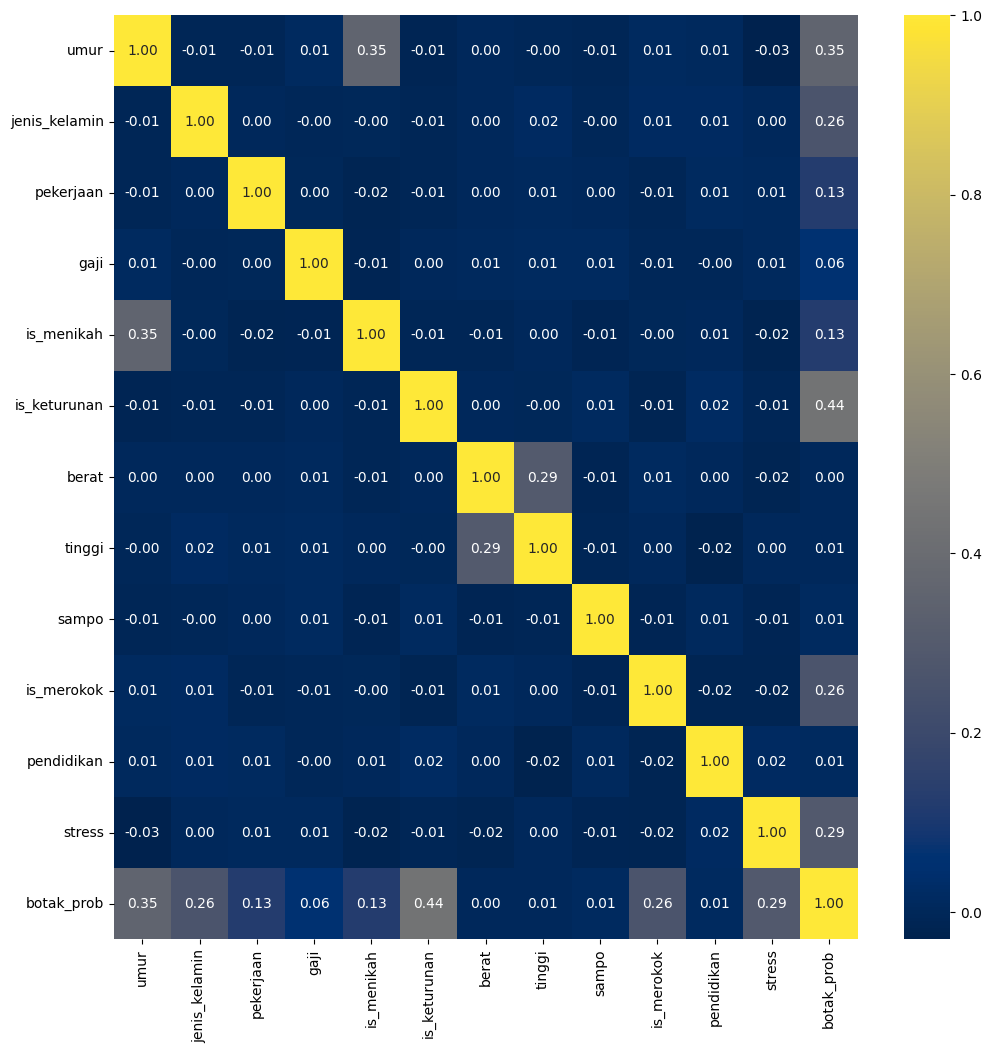

In [184]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrMatrix, annot=True, fmt=".2f", cmap="cividis")
plt.show()

Setelah seluruh data menjadi kategori numerik, dapat dilihat korelasi masing-masing kolom terhadap kolom botak_prob.

## Modeling

### Linear Regression

In [201]:
X = df.drop(['botak_prob'], axis=1)
y = df['botak_prob']

In [202]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [203]:
from sklearn.linear_model import LinearRegression

In [204]:
model = LinearRegression()

In [205]:
model.fit(X_train,y_train)

LinearRegression()

In [206]:
test_predictions = model.predict(X_test)

In [207]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [208]:
linear_MAE = mean_absolute_error(y_test,test_predictions)
linear_MSE = mean_squared_error(y_test,test_predictions)

In [209]:
print('{:.4f}'.format(linear_MAE))
print('{:.4f}'.format(linear_MSE))

0.0859
0.0131


### Polynomial

In [210]:
from sklearn.preprocessing import PolynomialFeatures

In [211]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [213]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

In [214]:
test_predictions = model.predict(X_test)
poly_MAE = mean_absolute_error(y_test,test_predictions)
poly_MSE = mean_squared_error(y_test,test_predictions)

In [215]:
print('{:.4f}'.format(poly_MAE))
print('{:.4f}'.format(poly_MSE))

0.0864
0.0129


| No | Algoritma           | MSE | MAE |
|----|---------------------|-----|-----|
| 1  | Linear Regression   |  0.0131   |   0.0859  |
| 2  | Polynomial          |   0.0129  |   0.0864  |


Pada tabel hasil tersebut, algoritma Polynomial memiliki hasil MSE sebesar 0.0129, hasil ini lebih rendah daripada algoritma Linear Regression dengan MSE sebesar 0.0131. Sedangkan pada nilai MAE, algoritma Linear Regression memiliki hasil sebesar 0.0859, lebih rendah daripada algoritma Polynomial sebesar 0.0864. Semakin rendah nilai atau mendekati nol dari nilai MSE dan MAE, maka semakin baik performa dari model tersebut. Sehingga jika dilakukan implementasi dari model, dapat ditinjau melalui MSE atau MAE.